# Automobile Price Prediction

##  Import all the required libraries

In [1]:
import pandas as pd                                   #for analysis of data
import numpy as np                                    #for linear algebra
import matplotlib.pyplot as plt                       #for data visualization 
import seaborn as sns                                 #for data visualization 
%matplotlib inline
from sklearn.model_selection import train_test_split  #for evaluation
import warnings                                       #for ignoring warnings
warnings.filterwarnings('ignore')

## Reading data

In [2]:
automobile = pd.read_csv("Automobile price data _Raw_.csv",na_values='?')

#For additional values to be recognized, we use 'na_values'.
#As in our dataset '?' is the string to be recognized we include na_values='?'

In [3]:
automobile.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
#dimension of the dataset
automobile.shape

(205, 26)

In [5]:
#information about the dataframe
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
#describing data
automobile.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


As most of the columns in the dataset have object datatype containing '?',we either have to drop or fill those positions.
## Data cleaning 

In [7]:
#checking missing values i.e columns containing '?'
automobile.isnull()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#checking the count of missing values w.r.t ccolumns 
automobile.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

As displayed above,the columns nomalized-losses,num-of doors etc. has '?'.

Filling '?' in normalized-losses column with it's mean i.e mean of normalized-losses column.

In [9]:
automobile['normalized-losses'].fillna(automobile['normalized-losses'].mean(),inplace=True)

Filling '?' in the entire series using interpolate()

In [10]:
automobile.interpolate(inplace=True)

In [11]:
automobile.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Every '?' in the columns has been replaced except num-of-doors column.

As it contains words instead of numbers.

In [12]:
#getting count of unique values
automobile['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Replacing the two '?' in num-of-doors column with four.
Since majority of cars have 4 doors

In [13]:
automobile['num-of-doors'].fillna('four',inplace = True)

In order to find the co-relatioin, we need numerical values.

But num-of-doors and num-of-cylinders columns have strings,
Replace them with numbers by defining a dictionary

In [14]:
replace_value= {'num-of-doors' : {'two' : 2, 'four' : 4},
     'num-of-cylinders' : {'two' : 2, 'three' : 3, 'four' : 4, 'five' : 5, 'six' : 6, 'eight' : 8, 'twelve' : 12}}
automobile.replace(replace_value, inplace = True)

In [15]:
#Checking whether the values has been replaced
automobile['num-of-doors'].value_counts()

4    116
2     89
Name: num-of-doors, dtype: int64

In [16]:
automobile['num-of-cylinders'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: num-of-cylinders, dtype: int64

To find the co-relatioin, we need numerical values.

The column 'make' contains strings and duplicate values
Replacing the string values in 'make' column with their respective mean 'price'.

In [17]:
#dividing by 100000 for much smaller values
make_mean_price = automobile.groupby('make')['price'].mean()/100000
automobile['make'] = automobile['make'].map(make_mean_price)

In [18]:
automobile['make']

0      0.154983
1      0.154983
2      0.154983
3      0.181868
4      0.181868
         ...   
200    0.180632
201    0.180632
202    0.180632
203    0.180632
204    0.180632
Name: make, Length: 205, dtype: float64

In [19]:
#getting info
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    int64  
 16  engine-size        205 non

Finding co-relation by plotting heatmap

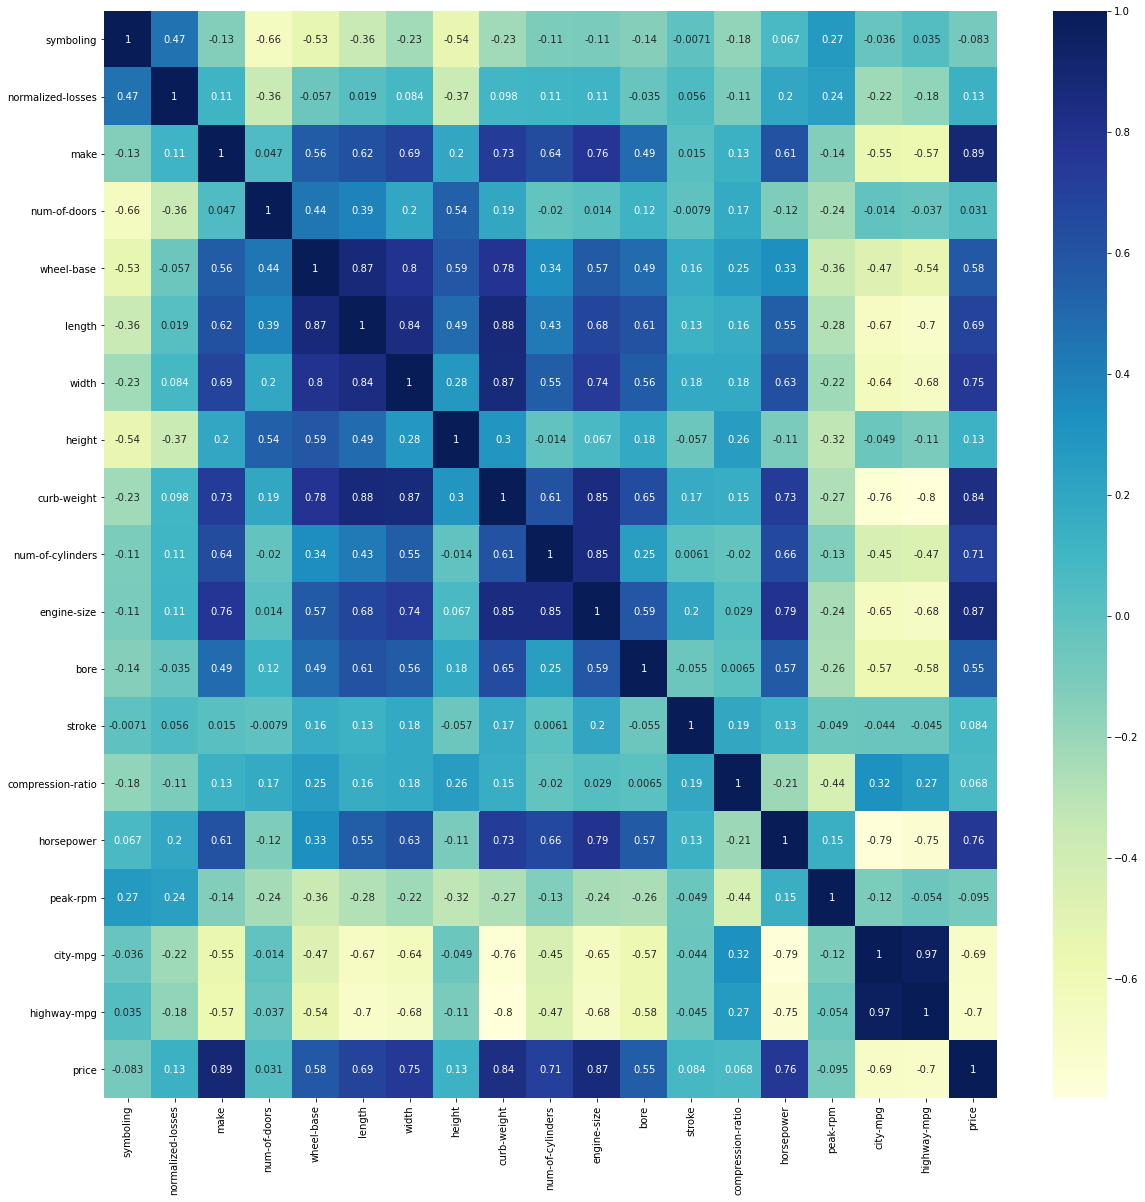

In [20]:
plt.figure(figsize = (20, 20))
sns.heatmap(automobile.corr(), annot = True,cmap = 'YlGnBu')
plt.show()

Drawing conclusion From the heatmap:

Darker shades and brighter shades are co-related.
Darker shades are negatively co-related in essence inversely proportional.
Brighter shades are positively co-related in essence directly proportional
And those which are in mid-range have less or no co-relation.

Since most of the cars have engine placed in front, the engine location doesn't have any effect on the car's price

In [21]:
#dropping the engine-location column 
mod_data=automobile.drop('engine-location',axis = 1)

In [22]:
#checking if the column dropped
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    float64
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    int64  
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

For evaluating data using various algorithms the datatypes must be int else float. If the datatype is of object type we cannot evaluate.

In [23]:
#using get_dummies to convert categorical values containing columns to indicatory values
mod_data=pd.get_dummies(mod_data)

In [24]:
mod_data.head()

,symboling,normalized-losses,make,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,...,engine-type_ohcv,engine-type_rotor,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,0.154983,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
1,3,122.0,0.154983,2,88.6,168.8,64.1,48.8,2548,4,...,0,0,0,0,0,0,0,1,0,0
2,1,122.0,0.154983,2,94.5,171.2,65.5,52.4,2823,6,...,1,0,0,0,0,0,0,1,0,0
3,2,164.0,0.181868,4,99.8,176.6,66.2,54.3,2337,4,...,0,0,0,0,0,0,0,1,0,0
4,2,164.0,0.181868,4,99.4,176.6,66.4,54.3,2824,5,...,0,0,0,0,0,0,0,1,0,0


As observed above, we can notice that columns which contained categorical values has been split into individual indicatory values

In [25]:
#checking dataypes again 
mod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float64
 2   make                    205 non-null    float64
 3   num-of-doors            205 non-null    int64  
 4   wheel-base              205 non-null    float64
 5   length                  205 non-null    float64
 6   width                   205 non-null    float64
 7   height                  205 non-null    float64
 8   curb-weight             205 non-null    int64  
 9   num-of-cylinders        205 non-null    int64  
 10  engine-size             205 non-null    int64  
 11  bore                    205 non-null    float64
 12  stroke                  205 non-null    float64
 13  compression-ratio       205 non-null    float64
 14  horsepower              205 non-null    fl

Every column/data is of numerical type.

Hence all those columns which were of object type has been converted (some removed).

In [26]:
#splitting data into train set and test set
X = mod_data.drop('price', axis = 1)       #input
y = mod_data['price']                      #output
#since we have to predict the price,it cannot be included in the input.
#Hence dropped 

In [27]:
#splitting data with size 30% in essence 70% train data and remaining 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,shuffle=True)

## Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression   #importing LineraRegression
from sklearn.metrics import r2_score                #importing R-2 score

Training the model

In [29]:
model = LinearRegression()                          #Creating an instance
model.fit(X_train, y_train)                         #fitting train data
prediction = model.predict(X_test)                  #predicting

In [30]:
#calculaing R-2 score
r2 = r2_score(y_test, prediction)
print(round(r2,4))

0.7884


We got an accuracy of 82 %

In [31]:
#printing co-efficients
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-8.13484980e+01  1.86209706e-01  3.83167975e+04  1.12656259e+02
 -1.08504684e+02  9.23451401e+01  1.55746872e+02  1.52831922e+02
  1.67265666e+00 -4.96996239e+02  1.73581535e+02 -6.72259977e+03
 -5.46844649e+03  6.40669961e+02  1.32334345e+01  2.56254426e+00
  2.06875626e+02 -5.79236130e+01 -2.80387410e+03  2.80387410e+03
 -1.59141914e+03  1.59141914e+03  3.04390070e+03 -4.12217510e+02
 -6.41648676e+01 -9.84041605e+02 -1.58347672e+03  4.11948628e+02
 -4.13618446e+01 -3.70586784e+02 -3.52907494e+03  5.45696821e-12
 -4.86448603e+01 -4.42540675e+02 -3.22878458e+02 -5.24639507e+03
  9.58953401e+03  6.24833828e+02  9.04631554e+02 -1.55350612e+03
 -2.80387410e+03  1.09118774e+03  1.12825958e+03  6.08467522e+02
  0.00000000e+00]


Testing the model

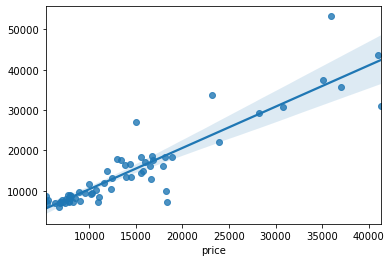

In [32]:
#plotting linear regression model fit
sns.regplot(x=y_test,y=prediction)

The best fit line is precised!

## Decision Tree (Regression Version)

In [33]:
from sklearn.tree import DecisionTreeRegressor #importing DecisionTreeRegressor
from sklearn.metrics import r2_score           #importing R-2 score

Training the model

In [34]:
model_2 = DecisionTreeRegressor()                #Creating an instance
model_2.fit(X_train, y_train)                    #fitting train data
prediction_2 = model_2.predict(X_test)           #predicting

In [35]:
#calculaing R-2 score
r2 = r2_score(y_test, prediction_2)
print(round(r2,4))

0.7953


We got an accuracy of 88 %

Testing the model

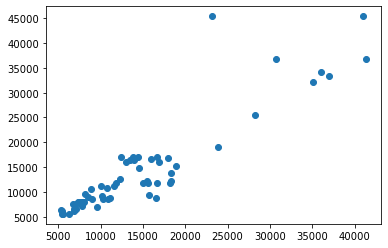

In [36]:
plt.scatter(x=y_test,y=prediction_2)

## Random Forest (Regression version)

In [37]:
from sklearn.ensemble import RandomForestRegressor      #importing RandomForestRegressor
from sklearn.metrics import r2_score                    #importing R-2 score

Training the model

In [38]:
model_3 = RandomForestRegressor()                #Creating an instance
model_3.fit(X_train, y_train)                    #fitting train data
prediction_3 = model_3.predict(X_test)           #predicting

In [39]:
#calculaing R-2 score
r2 = r2_score(y_test, prediction_3)
print(round(r2,4))

0.9059


We got an accuracy of 94 %

Testing the model

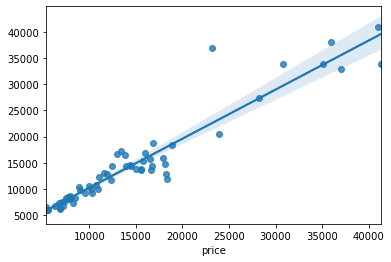

In [40]:
sns.regplot(x=y_test,y=prediction_3)

## ExtraTree (Regression Version)

In [41]:
from sklearn.tree import ExtraTreeRegressor    #importing ExtraTreeRegressor
from sklearn.metrics import r2_score           #importing R-2 score

In [42]:
model_4 = ExtraTreeRegressor()                   #Creating an instance
model_4.fit(X_train, y_train)                    #fitting train data
prediction_4 = model_4.predict(X_test)           #predicting

In [43]:
#calculaing R-2 score
r2 = r2_score(y_test, prediction_4)
print(round(r2,4))

0.8778


We got an accuracy of 81 %

Testing the model

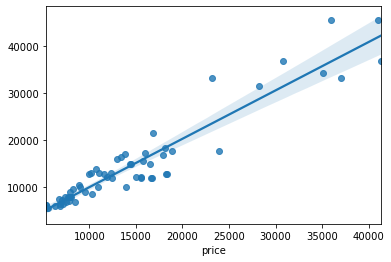

In [44]:
sns.regplot(x=y_test,y=prediction_4)

As we got highest R-2 score in RandomForest regression version algorithm, we plot distplot for observations.

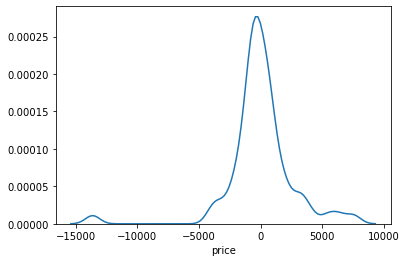

In [46]:
residual = y_test - prediction_3
sns.distplot(residual,hist=False)